# Garimpagem de Dados

## Aula 4 - Exercício de Classificação com kNN

13/10/2017

Patrick Anderson Moreira Marcelino

**Dataset:** Titanic: Machine Learning from Disaster

https://www.kaggle.com/c/titanic/data

Partindo da aula passada:

1. Atualizar a função que mede a distância euclidiana para o pacote do scikit-learn 

2. Implementar uma função que selecione os k vizinhos mais próximos (k > 1)

3. Implementar uma função que recebe os k vizinhos mais próximos e determinar a classe correta

4. Transformar as features categoricas em numéricas (tip: pandas ou scikit-learn)

5. Analisar a necessidade de normalizar as features numéricas (tip: pandas ou scikit-learn)

6. Selecionar as features baseada na correlação (tip: pandas)

7. Separar o dataset em treino (75%) / teste (25%) / validação (10% do treino)

4. Execute o classificador para 30 k's pulando de 4 em 4 e apresente todas as acurácias utilizando o dataset de validação (Qual o melhor k?) [plotar um gráfico com os resultados]

5. Executar o classificador para o melhor k encontrado utilizando o dataset de teste e apresentar um relatório da precisão (tip: scikit-learn) [plotar um gráfico com os resultados]

In [38]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import DistanceMetric
from collections import Counter
from operator import itemgetter
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [12]:
class KNNClassifier(object):
    def __init__(self):
        self.train_data = None
        self.train_labels = None
    
    
    def fit(self, train_d, train_l):
        self.train_data = train_d
        self.train_labels = train_l
    
    
    def euc_distance(self, a, b):
        dist = DistanceMetric.get_metric('euclidean') # utilizando a distância euclidiana do scikit
        return dist.pairwise([a], [b])

    # Encontrando os k vizinhos mais próximos (k > 1)
    def closests(self, k, test):
        distances = []
        for i in range(len(self.train_data)):
            dist = self.euc_distance(test, self.train_data[i])
            distances.append((self.train_data[i], dist, self.train_labels[i]))
        distances.sort(key = itemgetter(1))
        neighbors = distances[:k]
        return neighbors
    
    # Faz a eleição dos k vizinhos mais próximos, determinando a classe   
    def election(self, neighbors):
        class_counter = Counter()
        for neighbor in neighbors:
            class_counter[neighbor[2]] += 1
        return class_counter.most_common(1)[0][0]
    
    def predict(self, k, test):
        votes = []
        for i in range(len(test)):
            neighbors = self.closests(k, test[i])
            v = self.election(neighbors)
            votes.append(v)
        return votes

In [23]:
#Carrega o dataset
dataset = pd.read_csv("train.csv")
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [24]:
#Dados faltantes (NaN)

dataset.Age = dataset.Age.fillna(dataset.Age.mean()) # utilizada a média das idades
dataset.Cabin = dataset.Cabin.fillna('SC')

dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,SC,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,SC,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,SC,S


In [25]:
# Transformando dados categóricos em numéricos
columns = ['Name','Sex','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
datasetc = dataset
for c in columns:
    datasetc[c] = dataset[c].astype('category')
    datasetc[c] = datasetc[c].cat.codes
datasetc.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,18,146,2
1,2,1,1,190,0,38.0,1,0,596,207,81,0
2,3,1,3,353,0,26.0,0,0,669,41,146,2
3,4,1,1,272,0,35.0,1,0,49,189,55,2
4,5,0,3,15,1,35.0,0,0,472,43,146,2


In [28]:
# Normalizando os atributos numéricos
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
dataset_scaled = min_max_scaler.fit_transform(dataset)
datasetn = pd.DataFrame(dataset_scaled)
datasetn.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
datasetn.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.000000,0.0,1.0,0.121348,1.0,0.271174,0.166667,0.0,0.769118,0.072874,0.993197,1.000000
1,0.001124,1.0,0.0,0.213483,0.0,0.472229,0.166667,0.0,0.876471,0.838057,0.551020,0.333333
2,0.002247,1.0,1.0,0.396629,0.0,0.321438,0.000000,0.0,0.983824,0.165992,0.993197,1.000000
3,0.003371,1.0,0.0,0.305618,0.0,0.434531,0.166667,0.0,0.072059,0.765182,0.374150,1.000000
4,0.004494,0.0,1.0,0.016854,1.0,0.434531,0.000000,0.0,0.694118,0.174089,0.993197,1.000000


In [29]:
# Selecionando as features baseado na correlação 
datasetn.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.033207,-0.065229,-0.001652,-0.056554,-0.006390,-0.035197,0.012985
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.069809,-0.026385,0.081629,-0.164549,0.333943,-0.253658,-0.176509
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.331339,0.078141,0.018443,0.319869,-0.724119,0.682176,0.173511
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.057466,-0.035535,-0.049105,0.047348,-0.053846,0.062119,-0.010633
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.084153,-0.123164,-0.245489,0.059372,-0.265389,0.095991,0.118492
Age,0.033207,-0.069809,-0.331339,0.057466,0.084153,1.000000,-0.254997,-0.179191,-0.068848,0.110296,-0.234912,-0.039610
SibSp,-0.065229,-0.026385,0.078141,-0.035535,-0.123164,-0.254997,1.000000,0.423338,0.069238,0.368688,0.040687,0.069165
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.179191,0.423338,1.000000,0.020003,0.361243,-0.028179,0.043351
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.068848,0.069238,0.020003,1.000000,-0.168153,0.243082,0.011146
Fare,-0.006390,0.333943,-0.724119,-0.053846,-0.265389,0.110296,0.368688,0.361243,-0.168153,1.000000,-0.538549,-0.169849


In [30]:
# Descartando as features que não servem pra predição
datasetd = datasetn.drop(['PassengerId','SibSp','Embarked','Age','Name','Parch','Ticket','Cabin'], axis=1)
datasetd.head()

,Survived,Pclass,Sex,Fare
0,0.0,1.0,1.0,0.072874
1,1.0,0.0,0.0,0.838057
2,1.0,1.0,0.0,0.165992
3,1.0,0.0,0.0,0.765182
4,0.0,1.0,1.0,0.174089


In [31]:
# Split do dataset em treino (75%) / teste (25%) / validação (10% do treino)

y = datasetd.Survived.values
X = datasetd.drop('Survived', axis=1).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1)

In [49]:
a_accuracy = []
ks = []

for k in range(3,30,4): # k variando de 3 a 30, de 4 em 4
    knn = KNNClassifier()
    knn.fit(X_train, y_train) # treinamento do modelo
    result = knn.predict(k, X_test) # resultado
    accuracy = metrics.accuracy_score(result,y_test)
    a_accuracy.append(accuracy)
    ks.append(k)

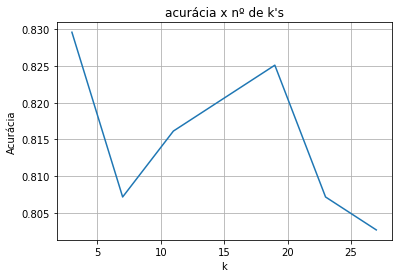

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(ks, a_accuracy);
plt.grid()
plt.title('acurácia x nº de k\'s')
plt.xlabel('k')
plt.ylabel(u'Acurácia')
plt.show()

In [51]:
# Encontrar melhor acurácia
index, best_accuracy = max(enumerate(a_accuracy))
print('Acurácia:', best_accuracy,
      '\nÍndice:',index,
     '\nMelhor k:',ks[index])

Acurácia: 0.80269058296 
Índice: 6 
Melhor k: 27


In [52]:
knn_best = KNNClassifier()
knn_best.fit(X_train, y_train)
result = knn.predict(ks[index], X_validation)
accuracy = metrics.accuracy_score(result,y_validation)
print('{0:f}'.format(accuracy))

0.776119


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_validation, result, target_names=['Survived', 'Not Survived']))

              precision    recall  f1-score   support

    Survived       0.77      0.93      0.84        43
Not Survived       0.80      0.50      0.62        24

 avg / total       0.78      0.78      0.76        67

